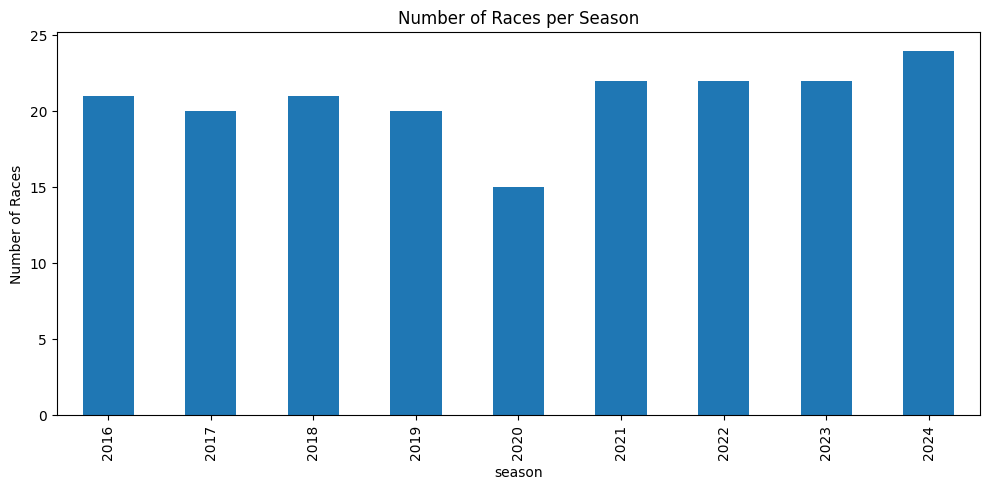

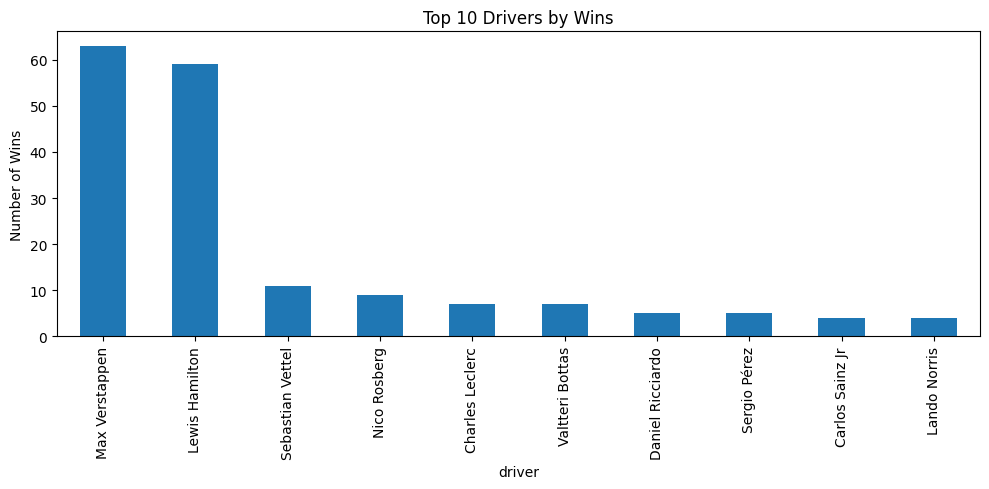

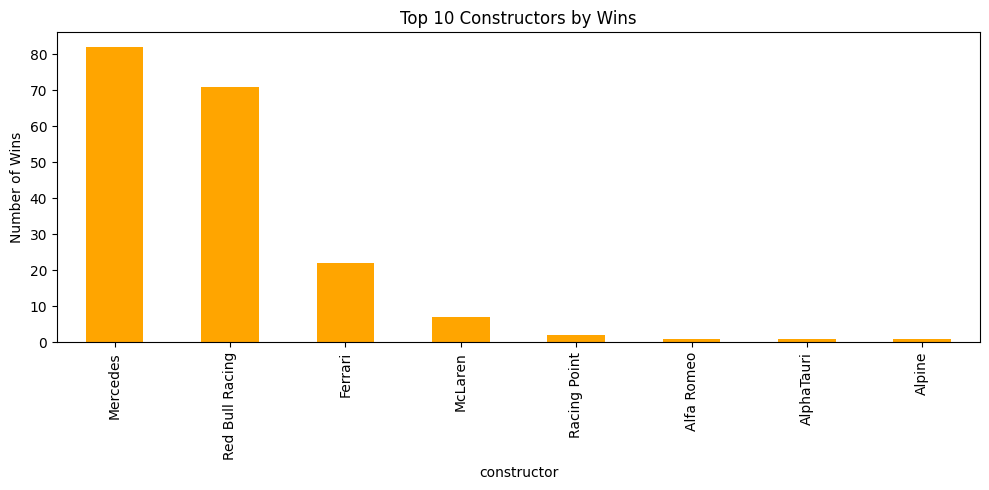

🏆 Driver with most wins per season:
    season          driver  wins
1     2016  Lewis Hamilton    10
5     2017  Lewis Hamilton     9
12    2018  Lewis Hamilton    11
16    2019  Lewis Hamilton    11
21    2020  Lewis Hamilton     9
29    2021  Max Verstappen    10
36    2022  Max Verstappen    15
39    2023  Max Verstappen    19
46    2024  Max Verstappen     9
🏆 Constructor with most wins per season:
    season      constructor  wins
0     2016         Mercedes    19
3     2017         Mercedes    12
7     2018         Mercedes    11
10    2019         Mercedes    15
13    2020         Mercedes    11
20    2021  Red Bull Racing    10
23    2022  Red Bull Racing    17
25    2023  Red Bull Racing    21
29    2024  Red Bull Racing     9


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("../data/race_results.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Convert season and round to numeric
df['season'] = pd.to_numeric(df['season'], errors='coerce')
df['round'] = pd.to_numeric(df['round'], errors='coerce')

# Drop missing values
df.dropna(subset=['season', 'round', 'driver', 'constructor'], inplace=True)

# ========================
# 1. Races per Season
# ========================
races_per_season = df.groupby('season')['racename'].nunique()

races_per_season.plot(kind='bar', figsize=(10,5), title='Number of Races per Season')
plt.ylabel('Number of Races')
plt.tight_layout()
plt.show()

# ========================
# 2. Wins by Driver
# ========================
driver_wins = df['driver'].value_counts()

driver_wins.head(10).plot(kind='bar', figsize=(10,5), title='Top 10 Drivers by Wins')
plt.ylabel('Number of Wins')
plt.tight_layout()
plt.show()

# ========================
# 3. Wins by Constructor
# ========================
constructor_wins = df['constructor'].value_counts()

constructor_wins.head(10).plot(kind='bar', color='orange', figsize=(10,5), title='Top 10 Constructors by Wins')
plt.ylabel('Number of Wins')
plt.tight_layout()
plt.show()

# ========================
# 4. Year-wise Driver Champions (Most Wins per Season)
# ========================
yearly_driver_wins = df.groupby(['season', 'driver']).size().reset_index(name='wins')
champions = yearly_driver_wins.loc[yearly_driver_wins.groupby('season')['wins'].idxmax()]
print("🏆 Driver with most wins per season:")
print(champions)

# ========================
# 5. Year-wise Constructor Champions (Most Wins per Season)
# ========================
yearly_constructor_wins = df.groupby(['season', 'constructor']).size().reset_index(name='wins')
constructor_champs = yearly_constructor_wins.loc[yearly_constructor_wins.groupby('season')['wins'].idxmax()]
print("🏆 Constructor with most wins per season:")
print(constructor_champs)


In [4]:
print(df.columns.tolist())


['season', 'round', 'racename', 'driver', 'constructor']
